<a href="https://colab.research.google.com/github/mosthm/FavoritePlacess/blob/master/HumpDayPlot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install humpday scikit-optimize optuna platypus-opt poap pysot cmake ultraopt dlib ax-platform py-bobyqa hebo nlopt freelunch

In [ ]:
pip install  bayesian-optimization nevergrad

In [10]:
from humpday import minimize
from humpday.objectives.classic import ackley_on_cube

# Set the dimensionality of the problem
dim = 3

best_point, best_value = minimize(ackley_on_cube, n_trials=250, n_dim=dim)
print( best_point)
print( best_value)

Using scipy_powell_cube
0.9954896882970392
[0.8545550701034693, 0.8545550701034693, 0.8545550701034693]


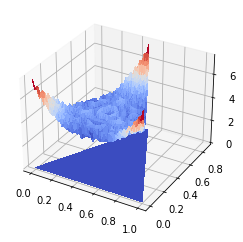

Using optuna_cmaes_cube
5.262755094347705e-06
[0.012610710024157357, 0.0004173242614433359, 0.5722071399775469]


In [30]:
import numpy as np
import matplotlib.pyplot as plt


def mesh2d_(f,*args):
    """ Plot function taking len 2 vector as single argument
          f(xs)
    """
    def g(x,y,*args):
        return f(np.array([x,y]),*args)
    mesh2d(g,*args)


def mesh2d(f,*args):
    """ Plot function taking two arguments
        f(x,y)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y =  np.arange(-0.5, 0.5, 0.005)
    X, Y = np.meshgrid(x, y)
    zs = np.array([ f(x_,y_,*args) for x_,y_ in zip( np.ravel(X), np.ravel(Y)) ])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

    
def simplex_surf(g):
    """
         g is a function defined on the 2-simplex 
         We change perspective so as to plot it 
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
  
    # Define the vertices of the triangle in R3
    p3 = np.array([0, 0, 0])
    p1 = np.array([1, 0, 0])
    p2 = np.array([0.5, np.sqrt(3)/2, 0])

    # Define points in the 2-simplex 
    s1s = list()
    s2s = list()
    s3s = list()
    for s1 in np.linspace(0,1.0,50):
      for s2 in np.linspace(0,1.0,50):
          s3 = 1-s1-s2
          if 0 <= s3 <= 1:
              s1s.append(s1)
              s2s.append(s2)
              s3s.append(s3)

    X = np.array([ s1*p1[0] + s2*p2[0] + s3*p3[0] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Y = np.array([ s1*p1[1] + s2*p2[1] + s3*p3[1] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Z = np.array([ g(u=[s1,s2,s3]) for s1, s2, s3 in zip(s1s,s2s,s3s)])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    from matplotlib import cm
    _surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    _shadow = ax.plot_trisurf(X, Y, np.zeros_like(Z), cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    plt.show()

from humpday import minimize
from humpday.objectives.classic import ackley_on_cube

from humpday.objectives.classic import salomon_on_cube

# Set the dimensionality of the problem
dim = 3


simplex_surf(salomon_on_cube)



#simplex_surf(objective)
def my_objective(u):
    time.sleep(0.01)
    return u[0]*math.sin(u[1])
#simplex_surf(my_objective)
best_point, best_value = minimize(my_objective, n_trials=250, n_dim=dim)
print( best_point)
print( best_value)

Using scipy_powell_cube
0.03221731226449484
[0.524021485540982, 0.5241810019959867]


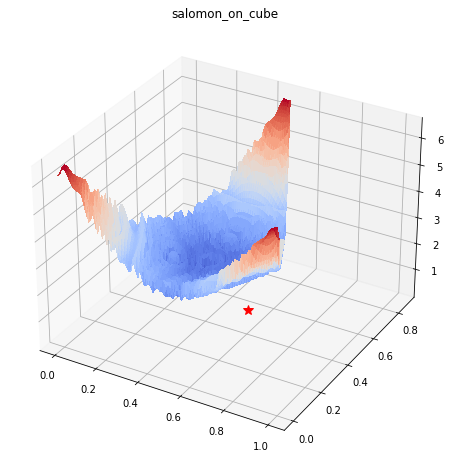

In [15]:
from humpday.objectives.classic import salomon_on_cube
import humpday as hu
import numpy as np
import matplotlib.pyplot as plt
from humpday import minimize
from humpday.objectives.classic import ackley_on_cube

def simplex_surf(g,best_value):
    """
         g is a function defined on the 2-simplex 
         We change perspective so as to plot it 
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
  
    # Define the vertices of the triangle in R3
    p3 = np.array([0, 0, 0])
    p1 = np.array([1, 0, 0])
    p2 = np.array([0.5, np.sqrt(3)/2, 0])

    # Define points in the 2-simplex 
    s1s = list()
    s2s = list()
    s3s = list()
    for s1 in np.linspace(0,1.0,100):
      for s2 in np.linspace(0,1.0,100):
          s3 = 1-s1-s2
          if 0 <= s3 <= 1:
              s1s.append(s1)
              s2s.append(s2)
              s3s.append(s3)

    X = np.array([ s1*p1[0] + s2*p2[0] + s3*p3[0] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Y = np.array([ s1*p1[1] + s2*p2[1] + s3*p3[1] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Z = np.array([ g(u=[s1,s2,s3]) for s1, s2, s3 in zip(s1s,s2s,s3s)])

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot( projection='3d')
    from matplotlib import cm
    _best_v=ax.plot(best_value[0],best_value[1],g(u=[best_value[0],best_value[1]]), 'r*', markersize=10)
    _surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    #_shadow = ax.plot_trisurf(X, Y, np.zeros_like(Z), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title(g.__name__)
    
    plt.show()


# Set the dimensionality of the problem
dim = 2


def my_objective(u):
    time.sleep(0.01)
    return u[0]*math.sin(u[1])


best_point, best_value = minimize(salomon_on_cube, n_trials=250, n_dim=dim)
print( best_point)
print( best_value)

simplex_surf(salomon_on_cube,best_value)




Using scipy_powell_cube
9.06815189530661
[0.5351500504322096, 0.5339137824673448, 0.5329358728359995]


/usr/local/lib/python3.9/dist-packages/humpday/optimizers/scipycube.py:29: OptimizeWarning: Unknown solver options: method
  result = minimize(_objective, x0=[0]*n_dim, method=options['method'],bounds=bounds, options=options)


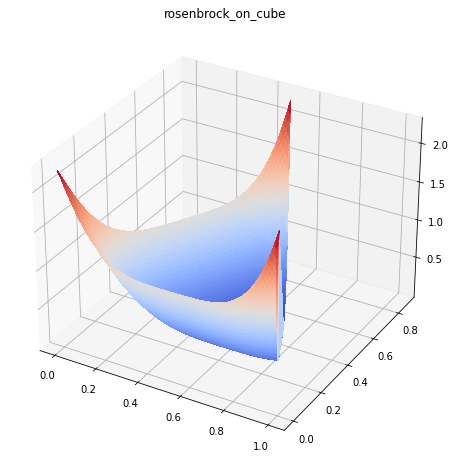

In [5]:
from humpday.objectives.classic import salomon_on_cube
import humpday as hu
import numpy as np
import matplotlib.pyplot as plt
from humpday import minimize
from humpday.objectives.classic import rosenbrock_on_cube

def simplex_surf(g,best_value):
    """
         g is a function defined on the 2-simplex 
         We change perspective so as to plot it 
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
  
    # Define the vertices of the triangle in R3
    p3 = np.array([0, 0, 0])
    p1 = np.array([1, 0, 0])
    p2 = np.array([0.5, np.sqrt(3)/2, 0])

    # Define points in the 2-simplex 
    s1s = list()
    s2s = list()
    s3s = list()
    for s1 in np.linspace(0,1.0,100):
      for s2 in np.linspace(0,1.0,100):
          s3 = 1-s1-s2
          if 0 <= s3 <= 1:
              s1s.append(s1)
              s2s.append(s2)
              s3s.append(s3)

    X = np.array([ s1*p1[0] + s2*p2[0] + s3*p3[0] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Y = np.array([ s1*p1[1] + s2*p2[1] + s3*p3[1] for s1, s2, s3 in zip(s1s,s2s,s3s) ])
    Z = np.array([ g(u=[s1,s2,s3]) for s1, s2, s3 in zip(s1s,s2s,s3s)])

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot( projection='3d')
    from matplotlib import cm
    #_best_v=ax.plot(best_value[0],best_value[1],g(u=[best_value[0],best_value[1]]), 'r*', markersize=10)
    _surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    #_shadow = ax.plot_trisurf(X, Y, np.zeros_like(Z), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title(g.__name__)
    
    plt.show()


# Set the dimensionality of the problem
dim = 3


def my_objective(u):
    time.sleep(0.01)
    return u[0]*math.sin(u[1])


best_point, best_value = minimize(rosenbrock_on_cube, n_trials=250, n_dim=dim)
print( best_point)
print( best_value)

simplex_surf(rosenbrock_on_cube,best_value)




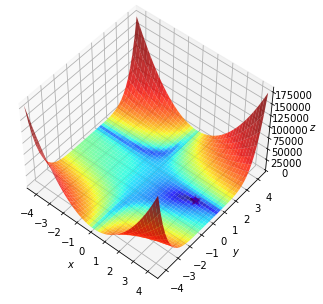

In [89]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
minima = np.array([3., .5])
f(*minima)
minima_ = minima.reshape(-1, 1)
minima_
f(*minima_)
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [81]:
from humpday.objectives.classic import salomon_on_cube
import humpday as hu
import numpy as np
import matplotlib.pyplot as plt
from humpday import minimize
from humpday.objectives.classic import ackley_on_cube


In [82]:
# Set the dimensionality of the problem
dim = 3

def my_objective(u):
    time.sleep(0.01)
    return u[0]*math.sin(u[1])


best_point, best_value = minimize(salomon_on_cube, n_trials=250, n_dim=dim)
print( best_point)
print( best_value)

#simplex_surf(salomon_on_cube,best_value)

Using scipy_powell_cube
0.5483526391340438
[0.622890510228204, 0.6057245395515196, 0.6398784018871072]


/usr/local/lib/python3.9/dist-packages/humpday/optimizers/scipycube.py:29: OptimizeWarning: Unknown solver options: method
  result = minimize(_objective, x0=[0]*n_dim, method=options['method'],bounds=bounds, options=options)


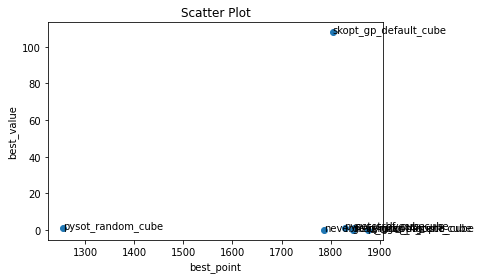

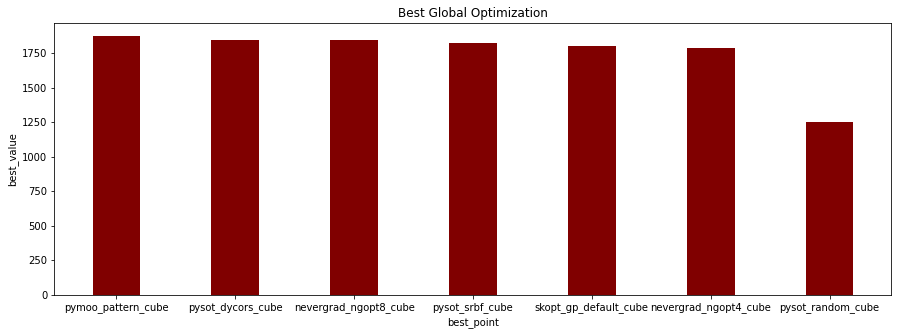

<ipython-input-31-ec80f28b8ae7>:57: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


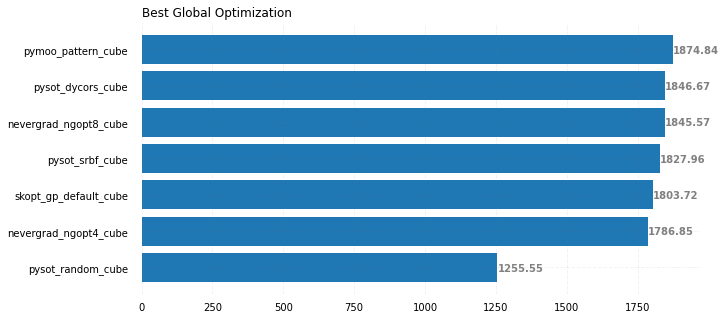

In [31]:
import numpy as np
import matplotlib.pyplot as plt
 
data = [(1874.8424485555254, 0.026349782943725586, 'pymoo_pattern_cube'),
        (1846.6696606821813, 0.9943943023681641, 'pysot_dycors_cube'),
        (1845.570829720803, 0.06265926361083984, 'nevergrad_ngopt8_cube'),
        (1827.9602608220416, 0.8775317668914795, 'pysot_srbf_cube'),
        (1803.7186569555618, 107.9180338382721, 'skopt_gp_default_cube'),
        (1786.853132034975, 0.06370377540588379, 'nevergrad_ngopt4_cube'),
        (1255.547198258487, 0.903048038482666, 'pysot_random_cube')]

x = [d[0] for d in data] # First element of each tuple
y = [d[1] for d in data] # Second element of each tuple
labels = [d[2] for d in data] # Third element of each tuple

plt.scatter(x, y)

for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))

plt.xlabel('best_point')
plt.ylabel('best_value')
plt.title('Scatter Plot')

plt.show()
  
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(labels,x , color ='maroon',
        width = 0.4)
 
plt.xlabel('best_point')
plt.ylabel('best_value')
plt.title("Best Global Optimization")
plt.show()

fig, ax = plt.subplots(figsize =(10, 5))
 
# Horizontal Bar Plot
ax.barh(labels, x)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Best Global Optimization',
             loc ='left', )
 

 
# Show Plot
plt.show()

In [3]:

from humpday import recommend
import time
import math

def my_objective(u):
    time.sleep(0.01)
    return u[0]*math.sin(u[1])

recommendations = recommend(my_objective, n_dim=21, n_trials=130)


Bayesian-Optimization warning:  https://github.com/fmfn/BayesianOptimization/issues/300
